### Warm-up Exercises:

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### - Has the network latency gone up since we switched internet service providers?


- H(null) hypothesis: There's no difference or latency decreased in network speed since switching one company to the next.
    
- H(a) hypothesis: There is an increase in latency since switching from one company to the next.

- True Negative Type 1 Error example: We reject the H(null) that there is no difference of latency, when there really is.

- False Negative Type 2 Error example: We fail to reject the H(null), by saying that there is a speed difference but the reality is that we also had added 1,000 more computers to the network too and THAT was why the speed decreased...not the network. 

- True Positive: I determined that the network latency has increased and it has.

- True Negative: I determined that the network latency has decreased or is no different, and it is true.


 { This example would be determined by a <b> Paired t-test</b>.  Where we look at our data under the previous condition and then look at the sample data under the current condition } 

#### - Is the website redesign any good?

- <i>Rephrasing: What webpages are most customers engaged on and on avg, how long are they on our website?</i>

- H(null)hypothesis: There are no customers coming to the website and engaging.
    
- H(a)hypothesis: There are x amount of customers that are on our webpages an average x amount of time AND navigating throughout pages.
    
- Type 1 error example: We say "Yes, we have x amount of customers visitng for x amount of time", but find that the IP addresses vists are bots.
    
- Type 2 error example: We say "No-one is coming to our site, or the wanted engagement isn't being met" and do not take into account that we are only testing on weekend days.

- True Positive: I determined that there was an increase of number of daily visits and it has.

- True Negative: I determined that there was no change (or a decrease) in the number of daily visits and it has

{Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign. (like when, why, how of changing a website)

Sometimes perfect comparisons are not achievable in the rapidly changing business world.

We need to understand that as data scientists, we need to NOT claim "this has increased due to ___", but rather saying "the data shows that there is a relationship that shows an increase after the website redesign"...because we really don't know the causality until further experiments.}

#### - Is our television ad driving more sales?

- <i> Rephrasing: Have we since seen an increase of sales since our tv ad has aired? How can we determine where our customers are coming from?
    
- H(null)hypothesis: There is no increase in sales since our ad aired.
    
-H(a)hypothesis: We have made x amount of sales since our ad aired date, AND we can track that the sales are directly related to the tv ad.
    
- True Negative example: I determine sales volume has stayed the same or decreased and it has.
    
- True Positive: I determine sales volume has increased and it did.
    
- Type 1 Error: I determine sales volume has increased when it actually decreased.
    
- Type 2 Error: I determine sales volume has decreased when it has actualy increased.

 ____________________________________________________

## Exercises : T-test

### Exercise One:

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.

In [20]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

𝛼  = 0.05

#office1
mean1 = 90
sdev1 = 15
ssize1 = 40

#office2
mean2 = 100
sdev2 = 20
ssize2 = 50

### What are we comparing?

- average time (numberic continuous values)for two different groups(categories)
- One sample or two?
- One tailed or two tailed?


In [18]:
# H_0: Average time to sell at office 1 == average time to sell at office 2
#H_a: Average time to sell at office 1 != average time to sell at office 2
t,p=stats.stats.ttest_ind_from_stats(mean1, sdev1, ssize1, mean2, sdev2, ssize2, equal_var=True)

In [120]:
alpha = 0.05

In [121]:
# visualize distributions

x = np.arange(50,150)

y1 = stats.norm(90, 15).pdf(x)
y1 = stats.norm(100, 20).pdf(x)



In [124]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t,p

(-2.7091418459143854, 0.00811206270346016)

In [125]:
if (p < alpha ):
    print ("We reject the null hypothesis!")
else:
    print("We accept the null hypothesis!")

We reject the null hypothesis!


### Exercise Two:
Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [64]:
from pydataset import data
mpg = data('mpg')

In [126]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,MPG Diff,Combined MPG
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,47
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,50
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,51
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,51
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,47
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,50
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,42
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,44


In [ ]:
#H_0: There is no difference in fuel efficiency in cars from 2008 and 1999
#H-a: There is a difference in fuel efficiency in cars from 2008 and 1999

In [ ]:
How should we measure "fuel-efficiency"?
Two approaches:
    - Run two ttests: one for highway and one for city
    - 

In [ ]:
mpg

In [101]:
#getting two ojects based on year
cars_2008 = mpg[mpg.year == 2008]
cars_1999 = mpg[mpg.year == 1999]

<AxesSubplot:>

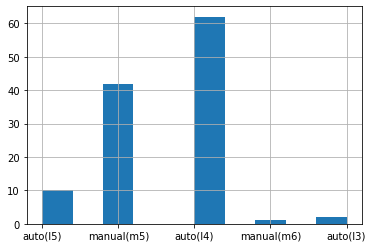

In [46]:
cars_1999.hist()

In [85]:
#finding the average number of hwy & cty combined

avg_hwy= mpg.hwy.mean()

avg_cty = mpg.cty.mean()

avg_mpg = avg_hwy + avg_cty

avg_mpg

40.299145299145295

In [91]:
combined_mpg= mpg.hwy + mpg.cty

In [94]:
#new column for combined mpg
mpg['Combined MPG'] = mpg.hwy + mpg.cty
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,MPG Diff,Combined MPG
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,47
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,50
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,51
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,51
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,47
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,50
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,42
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,44


In [113]:
#find 2008 fuel efficient cars (above the avg mpg)
cars_2008 = mpg[(mpg.year == 2008) & (mpg['Combined MPG'] >= 40)]
cars_2008['Combined MPG'].value_counts()

47    8
41    6
50    6
52    5
51    5
40    4
46    4
45    4
42    3
43    3
48    3
44    3
60    2
61    2
54    1
55    1
53    1
65    1
49    1
Name: Combined MPG, dtype: int64

In [116]:
cars_1999 = mpg[(mpg.year == 1999) & (mpg['Combined MPG'] >= 40)]

In [117]:
cars_1999.var(), cars_2008.var()

/var/folders/d3/11nygz6126ndxvtrp12687680000gn/T/ipykernel_51203/2617058342.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars_1999.var(), cars_2008.var()


(displ            0.502212
 year             0.000000
 cyl              1.086538
 cty             14.503846
 hwy             16.984615
 MPG Diff         2.109135
 Combined MPG    60.867788
 dtype: float64,
 displ            0.871357
 year             0.000000
 cyl              1.332309
 cty              7.135689
 hwy             10.142857
 MPG Diff         2.091142
 Combined MPG    32.465950
 dtype: float64)

In [119]:
t, p = stats.ttest_ind(cars_1999, cars_2008, equal_var= True)

TypeError: unsupported operand type(s) for /: 'str' and 'int'